In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
tf.enable_eager_execution

<function tensorflow.python.framework.ops.enable_eager_execution(config=None, device_policy=None, execution_mode=None)>

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
y_train.shape, y_test.shape

((60000,), (10000,))

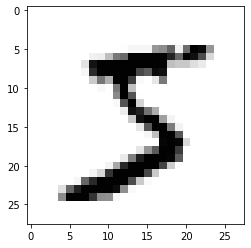

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [8]:
# X_test도 X_train과 마찬가지로 나눠줌
X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [9]:
# y는 0~9까지의 값을 가짐
y_train[0]

5

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
# one_hot_encoding 0~9
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

In [12]:
y_train[0]

<tf.Tensor 'strided_slice:0' shape=(10,) dtype=float32>

In [13]:
learning_rate = 0.001
num_epochs = 30 # 학습 횟수
batch_size = 256 # 배치 개수
display_step = 1 # 손실 함수 출력 주기
input_size = 784 # 28 * 28 = 784
hidden1_size = 256
hidden2_size = 256
output_size = 10

In [14]:
X_train_data = X_train.take(batch_size)
X_test_data = X_test.take(batch_size)

In [15]:
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = train_data.shuffle(60000).batch(batch_size)

In [16]:
# 입력값과 출력값을 받기 위해 플레이스홀더로 정의
x = tf.placeholder(tf.float32, shape = [None, input_size])
y = tf.placeholder(tf.float32, shape = [None, output_size])

In [17]:
def build_ANN(x):
    w1 = tf.Variable(tf.random_normal(shape=[input_size, hidden1_size]))
    b1 = tf.Variable(tf.random_normal(shape=[hidden1_size]))
    H1_output = tf.nn.relu(tf.matmul(x, w1) + b1)
    
    w2 = tf.Variable(tf.random_normal(shape=[hidden1_size, hidden2_size]))
    b2 = tf.Variable(tf.random_normal(shape=[hidden2_size]))
    H2_output = tf.nn.relu(tf.matmul(H1_output, w2) + b2)
    
    w_output = tf.Variable(tf.random_normal(shape=[hidden2_size, output_size]))
    b_output = tf.Variable(tf.random_normal(shape=[output_size]))
    logits = tf.matmul(H2_output, w_output) + b_output
    
    return logits

In [18]:
predicted_value = build_ANN(x)

In [19]:
# tf.nn.softmax_cross_entropy_with_logits 함수를 이용하여 활성함수를 적용하지 않은
# 출력층의 결과값(logits)에 softmax 함수를 적용

# 비용함수
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits = predicted_value, labels = y))

# 비용함수를 최소로하는 최적화
train_step = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [20]:
X_train[0:256]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
with tf.Session() as sess:
#     변수들에 초기값 할당
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(num_epochs):
        average_loss = 0.
        
        total_batch = int(X_train.shape[0]/batch_size)
        
        for i in range(total_batch):
            batch_x = X_train[i * batch_size: i* batch_size + batch_size]
            batch_y = y_train[i * batch_size: i* batch_size + batch_size]
#         for batch_x, batch_y in X_train_data:
            _, current_loss = sess.run([train_step, loss], feed_dict = {x: batch_x, y: batch_y})
            average_loss += current_loss / total_batch
            
        if epoch % display_step == 0:
            print("반복(Epoch): %d, 손실함수(Loss): %f"%((epoch+1), average_loss))
    
    print("정확도(Accuracy): %f" %(accuracy.eval(feed_dict = {x: X_test,
                                                              y: y_test})))

TypeError: The value of a feed cannot be a tf.Tensor object. Acceptable feed values include Python scalars, strings, lists, numpy ndarrays, or TensorHandles. For reference, the tensor object was Tensor("strided_slice_1:0", shape=(256, 10), dtype=float32) which was passed to the feed with key Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32).